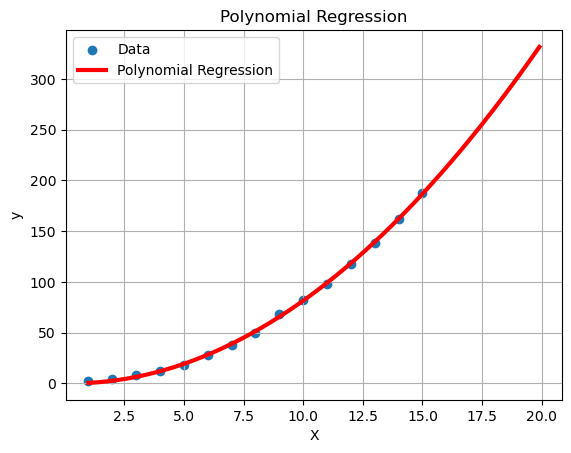

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.001, n_iterations=1000, alpha=0.01):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.alpha = alpha  # Regularization strength

    def fit(self, X, y):
        # Add polynomial features to the input data
        X_poly = self._add_polynomial_features(X, self.degree)

        # Initialize coefficients with zeros
        self.coefficients = np.zeros(X_poly.shape[1])

        # Gradient Descent with L2 regularization
        for _ in range(self.n_iterations):
            predictions = X_poly.dot(self.coefficients)
            errors = predictions - y
            gradient = (X_poly.T.dot(errors) + self.alpha * self.coefficients) / X_poly.shape[0]
            self.coefficients -= self.learning_rate * gradient

    def predict(self, X):
        X_poly = self._add_polynomial_features(X, self.degree)
        return X_poly.dot(self.coefficients)

    def _add_polynomial_features(self, X, degree):
        X_poly = X
        for d in range(2, degree + 1):
            X_poly = np.column_stack((X_poly, X**d))
        return X_poly

# Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
y = np.array([2, 4, 8, 12, 18, 28, 38, 50, 68, 82, 98, 118, 138, 162, 188])

# Create a PolynomialRegression model
poly_reg = PolynomialRegression(degree=2, learning_rate=0.0001, n_iterations=10000, alpha=0.001)  # Adjusted alpha

# Fit the model to the data
poly_reg.fit(X, y)

# Make predictions
X_extended = np.arange(1, 20, 0.1)  # Extend the range from 1 to 19.9 in small steps
y_pred_extended = poly_reg.predict(X_extended)

# Visualize the data and regression curve
plt.scatter(X, y, label='Data')
plt.plot(X_extended, y_pred_extended, color='r', linewidth=3, label='Polynomial Regression')  # Adjusted linewidth
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()
